In [1]:
import math
from matplotlib import cm
import matplotlib.pylab as plt 
import matplotlib.pyplot as mp
import numpy as np
plt.style.use("seaborn-dark") # print(plt.style.available)
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
# import matplotlib.pyplot as plt

In [2]:
def G(theta_0, theta_1):
    return 4 * ((theta_1 - 2)**2 + (theta_1 - 2)*(theta_0 - 1) + (theta_0 - 1)**2)

In [3]:
def R(theta_0, theta_1):
    part_1 = 1/5*(9/2*theta_1**2 + 12*theta_1)
    part_2 = 1/2*(3*theta_1*(theta_0 - theta_1) + 6*theta_0 - 7*theta_1)
    part_3 = 1/3*(2*theta_0**2 + 2*theta_1**2 - 7*theta_0*theta_1 + 2*theta_1 - 14*theta_0)
    part_4 = (theta_0 - theta_0*(theta_0 - theta_1)) 
    part_5 = 1/2*theta_0**2
    return  part_1 + part_2 + part_3 + part_4 + part_5    

In [4]:
G(theta_0 = 1, theta_1 = 2)

0

In [5]:
R(theta_0 = 1, theta_1 = 2)

-0.7666666666666657

In [6]:
step_size = 0.01 
theta_0 = np.arange(-1.0, 3.0 + step_size, step_size) # center 1
theta_1 = np.arange(0.0, 4.0 + step_size, step_size) # center 2

In [7]:
G_matrix = np.zeros((len(theta_0), len(theta_1)))
for dx in theta_0:
    for dy in theta_1:
        itemindex_1 = np.argwhere(theta_0 == dx)
        itemindex_2 = np.argwhere(theta_1 == dy)
        G_matrix[itemindex_1[0][0], itemindex_2[0][0]] = G(dx, dy)

In [8]:
R_matrix = np.zeros((len(theta_0), len(theta_1)))
for dx in theta_0:
    for dy in theta_1:
        itemindex_1 = np.argwhere(theta_0 == dx)
        itemindex_2 = np.argwhere(theta_1 == dy)
        R_matrix[itemindex_1[0][0], itemindex_2[0][0]] = R(dx, dy)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


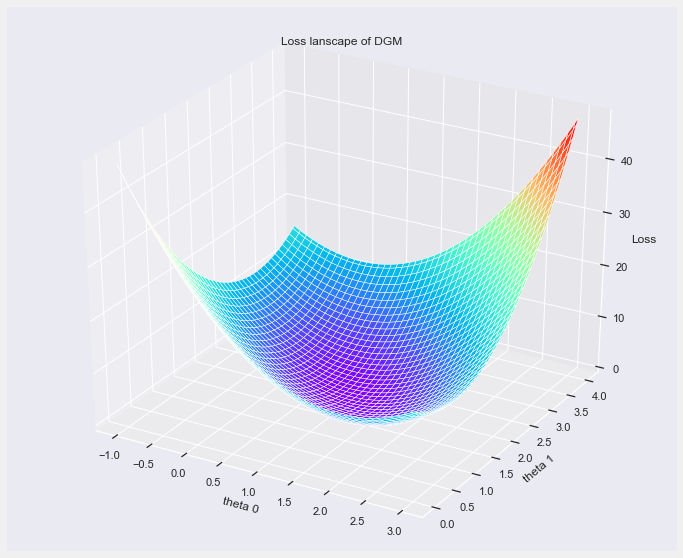

In [9]:
fig = plt.figure(figsize = (12, 10))
 
ax = fig.add_subplot(projection='3d') 

mp.gcf().set_facecolor(np.ones(3) * 240/255)

# make data
x, y = np.meshgrid(theta_0, theta_1)
z = np.zeros((len(theta_0), len(theta_1)))

for dx in theta_0:
    for dy in theta_1:
        itemindex_1 = np.argwhere(theta_0 == dx)
        itemindex_2 = np.argwhere(theta_1 == dy)
        z[itemindex_1[0][0], itemindex_2[0][0]] = G_matrix[itemindex_1[0][0], itemindex_2[0][0]]

# plot the surface
ax.plot_surface(x, y, z, cmap = 'rainbow', label = 'loss lanscape', linewidth = 0.5)

plt.title('Loss lanscape of DGM')
ax.set_xlabel('theta 0', size = 12) 
ax.set_ylabel('theta 1', size = 12)
ax.set_zlabel('Loss', size = 12)
plt.savefig("Loss3DPlotDGM.eps", dpi = 120)
plt.show()

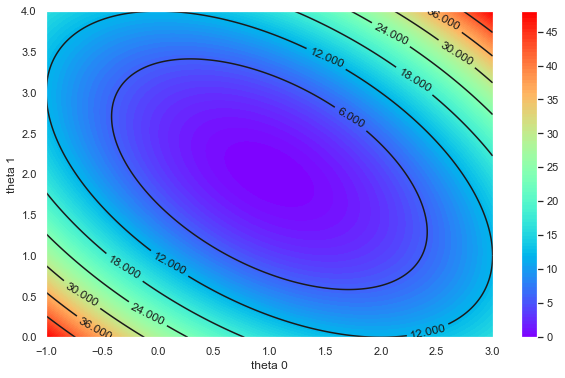

In [10]:
# set figure: length = 10 width = 6
mp.figure(figsize = (10, 6))

# fill color
# mp.contourf(x, y, z, 100, cmap = mp.cm.hot)
cset = mp.contourf(x, y, z, 100, cmap = mp.cm.rainbow)
# or plt.contourf(X,Y,Z, cmap = 'rainbow')

contour = mp.contour(x, y, z, 8, colors = 'k')

# label
mp.clabel(contour, fontsize = 12, colors = 'k')
mp.xlabel('theta 0')
mp.ylabel('theta 1')
 
# show bar
mp.colorbar(cset)
plt.savefig("Loss2DPlotDGM.eps", dpi = 120)
mp.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


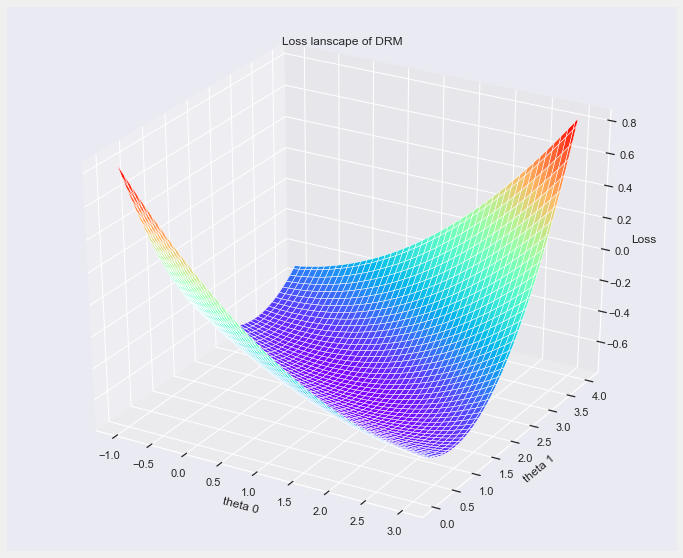

In [11]:
fig = plt.figure(figsize = (12, 10))
 
ax = fig.add_subplot(projection='3d') 

mp.gcf().set_facecolor(np.ones(3) * 240/255)

# make data 
x, y = np.meshgrid(theta_0, theta_1)
z = np.zeros((len(theta_0), len(theta_1)))

for dx in theta_0:
    for dy in theta_1:
        itemindex_1 = np.argwhere(theta_0 == dx)
        itemindex_2 = np.argwhere(theta_1 == dy)
        z[itemindex_1[0][0], itemindex_2[0][0]] = R_matrix[itemindex_1[0][0], itemindex_2[0][0]]

# plot the surface
ax.plot_surface(x, y, z, cmap = 'rainbow', label = 'loss lanscape', linewidth = 0.5)

plt.title('Loss lanscape of DRM')
ax.set_xlabel('theta 0', size = 12) 
ax.set_ylabel('theta 1', size = 12)
ax.set_zlabel('Loss', size = 12)
plt.savefig("Loss3DPlotDRM.eps", dpi = 120)
plt.show()

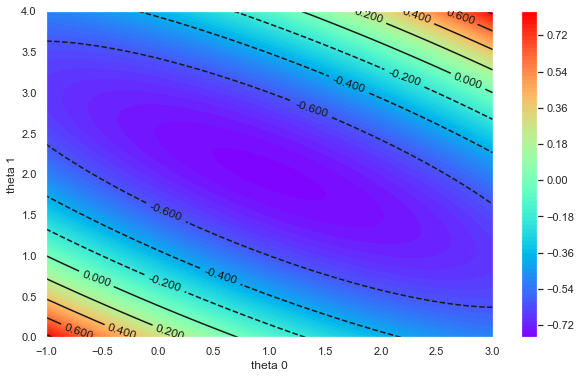

In [12]:
# set figure: length = 10 width = 6
mp.figure(figsize = (10, 6))

# fill color
# mp.contourf(x, y, z, 100, cmap = mp.cm.hot)
cset = mp.contourf(x, y, z, 100, cmap = mp.cm.rainbow)
# or plt.contourf(X,Y,Z, cmap = 'rainbow')

contour = mp.contour(x, y, z, 8, colors = 'k')

# label
mp.clabel(contour, fontsize = 12, colors = 'k')
mp.xlabel('theta 0')
mp.ylabel('theta 1')
 
# show bar
mp.colorbar(cset)
plt.savefig("Loss2DPlotDRM.eps", dpi = 120)
mp.show()